# Анализ шахматных дебютов и статистики игроков

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import decimal
import unittest
import psycopg2


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

np.random.seed(42)

Ввод данных

In [41]:
# import data

# Connect to the database
conn = psycopg2.connect(database="project", user="postgres", password="postgres", host="localhost")

with conn, conn.cursor() as cursor:
    with open("fetch_players_with_age.sql") as f:
        query = f.read()
    cursor.execute(query)
    result = cursor.fetchall()

DF = pd.DataFrame(result, columns=['fide', 'firstname', 'surname', 'country', 'sex',
                                   'birthdate', 'title', 'elo', 'age'])
DF.head()

,fide,firstname,surname,country,sex,birthdate,title,elo,age
0,10688862,Hoda,A Abdel Maabod,EGY,F,2009,,0,14
1,33496722,A,Aman,IND,M,1996,,0,27
2,10224084,Tapan,A B M Hasibuzzaman,BAN,M,1977,,0,46
3,10245154,Hossain,A B M Jobair,BAN,M,1998,,1631,25
4,10243054,Chowdhury,A B M Mustakim,BAN,M,2013,,0,10


Рассмотрим данные на предмет зависимости рейтинга игрока от его возраста.


Text(0.5, 1.0, 'Зависимость рейтинга от возраста')

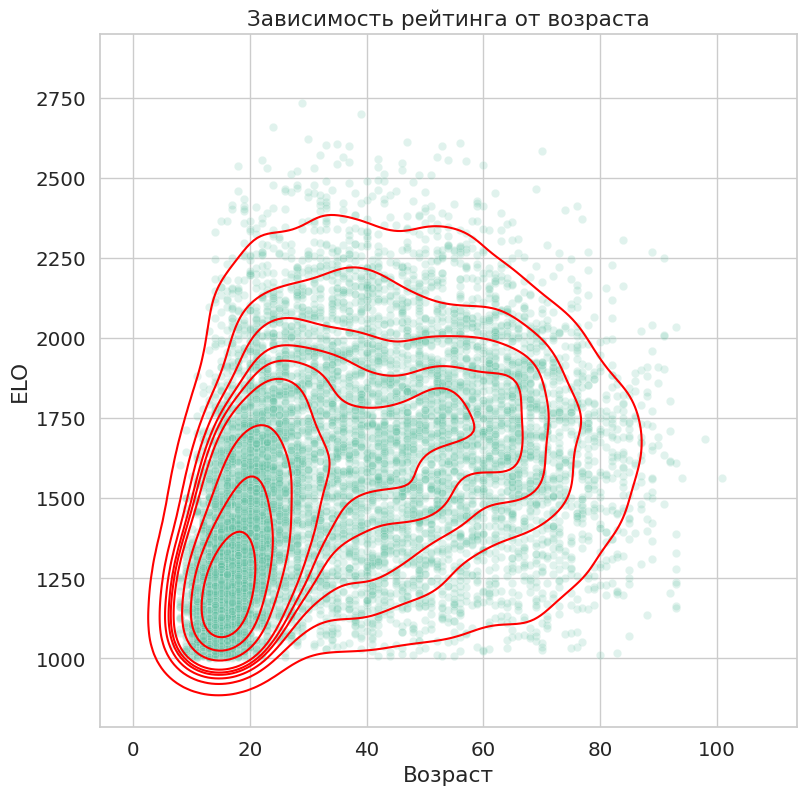

In [42]:
plt.figure(figsize=(9, 9))
sample = DF[DF['elo'] > 0].sample(n=10_000)

sns.kdeplot(data=sample, x='age', y='elo', color='red')
sns.scatterplot(data=sample, x='age', y='elo', alpha=0.2)
plt.xlabel('Возраст')
plt.ylabel('ELO')
plt.title('Зависимость рейтинга от возраста')

Из графика видно, что большая часть зарегистрированных игроков FIDE -- молодые шахматисты от
10 до 20 лет, рейтинг которых составляет от 100 до 1300 ELO. Среди более профессиональных
игроков большая часть имеет рейтинг около 1600 ELO, находясь в возрасте около 40 лет.


Рассмотрим распределения среднего рейтинга по странам

In [43]:
with conn, conn.cursor() as cursor:
    with open("../scripts/SELECTs/countries/countries_full_stats.sql") as f:
        query = f.read()
    cursor.execute(query)
    result = cursor.fetchall()

countries_DF = pd.DataFrame(result, columns=[desc[0] for desc in cursor.description])

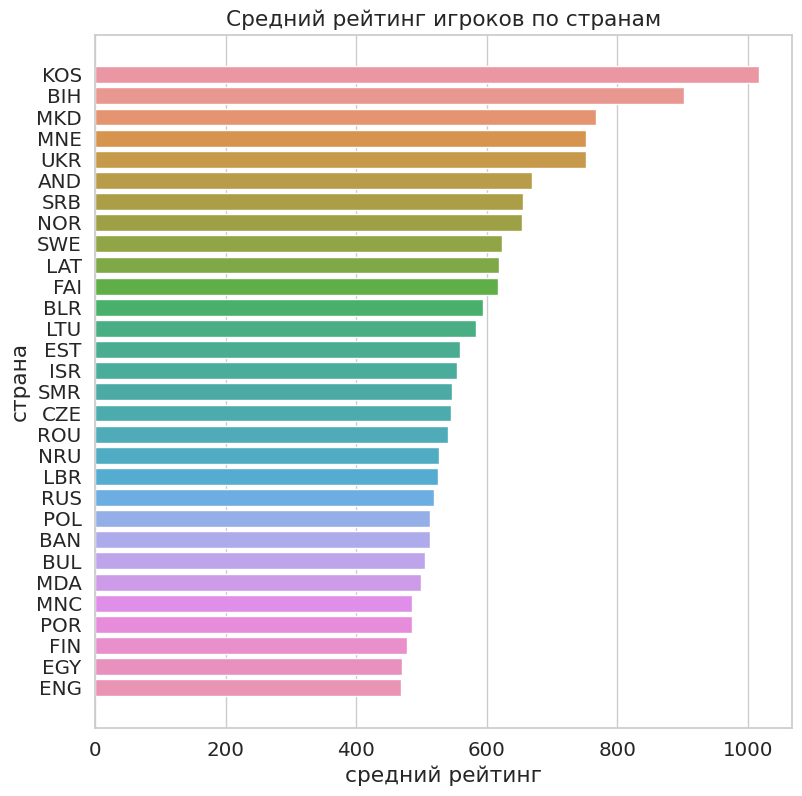

In [44]:
plt.figure(figsize=(9, 9))

sample = countries_DF.head(30)
sns.barplot(y=sample['страна'], x=sample['средний рейтинг'])
plt.title('Средний рейтинг игроков по странам')

sns.histplot()
plt.show()
